In [20]:
# see https://zulko.github.io/blog/2014/11/13/things-you-can-do-with-python-and-pov-ray/

import sys
!{sys.executable} -m pip install vapory numpy pillow matplotlib scikit-image scikit-image plyfile

In [2]:
#  https://zulko.github.io/blog/2014/11/13/things-you-can-do-with-python-and-pov-ray/
# https://github.com/Zulko/vapory

import numpy as np
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.filters import sobel
from vapory import *

color = lambda col: Texture( Pigment( 'color', col))

def RenderScene(scene, filename="tmp.png", width=800,height=600, antialiasing=0.001, show=True, remove_temp=False, **args):
  scene.render(filename, width=width, height=height, antialiasing=antialiasing, remove_temp=remove_temp, **args)
  ret=np.asarray(Image.open(filename))
  if show:
    imshow(ret)
    plt.show()
  return ret


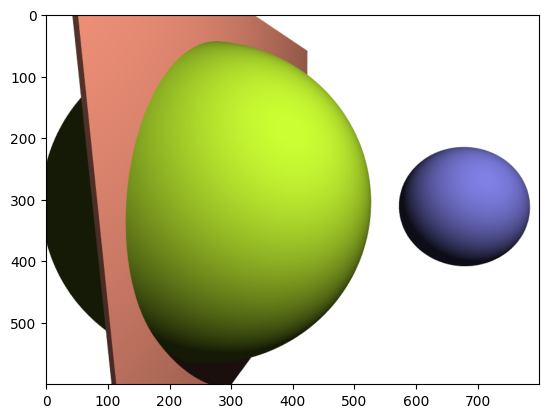

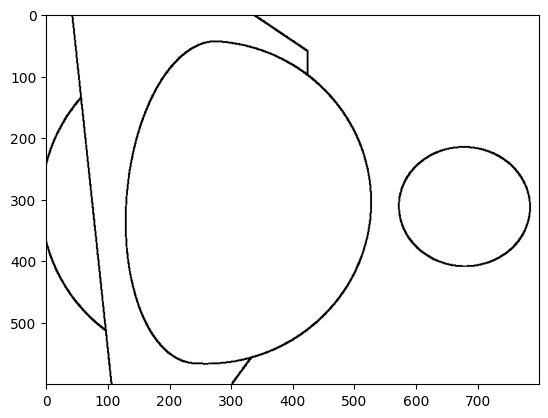

In [22]:
scene=Scene( 
  Camera( 'location', [0, 2, -3], 'look_at',  [1, 1, 2] ),
  [ 
    LightSource( [2, 4, -3], 'color', [1.5,1.5,1.5] ),
    Background( "color", [1,1,1] ),
    Sphere( [0, 1, 2] , 2,   color([.8, 1, .2])),
    Box( [-.8 , -1.5, -.5] , [-.75, 3.5, 5], color([1,.6,.5]), 'rotate', [0, 30, 0] ),
    Sphere( [ 3  , 1, 1.1] , .75,  color([.5, .5, .9]))
  ]
)

im=RenderScene(scene)

flat=RenderScene(scene, show=False, quality=1)
sobelized = np.array([sobel(1.0 * flat[:,:,i]) for i in [0, 1, 2]])
outline=np.dstack(3*[255*(sobelized.max(axis=0)==0)])
imshow(outline)
plt.show()

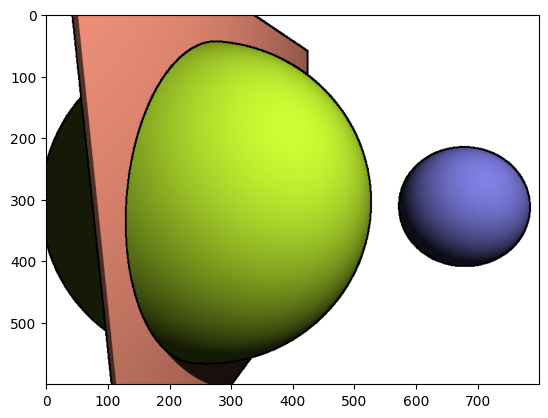

In [23]:
imshow(np.minimum(outline, im))

[(-2.0, -0.3889087438583374, -0.43890872597694397, 146, 230, 136, 255), (-2.0, -0.0353553406894207, -0.5853553414344788, 146, 230, 136, 255), (2.0, -0.0353553406894207, -0.5853553414344788, 146, 230, 136, 255), (2.0, -0.0353553406894207, -0.5853553414344788, 146, 230, 136, 255), (2.0, -0.3889087438583374, -0.43890872597694397, 146, 230, 136, 255), (-2.0, -0.3889087438583374, -0.43890872597694397, 146, 230, 136, 255), (-2.4000000953674316, -0.3535533845424652, -0.3535533845424652, 79, 153, 125, 255), (-2.4000000953674316, -0.3535533845424652, 0.3535533845424652, 79, 153, 125, 255), (-2.4000000953674316, 0.3535533845424652, 0.3535533845424652, 79, 153, 125, 255), (-2.4000000953674316, -0.3535533845424652, -0.3535533845424652, 79, 153, 125, 255), (-2.4000000953674316, -0.5, 1.387778801460961e-18, 79, 153, 125, 255), (-2.4000000953674316, -0.3535533845424652, 0.3535533845424652, 79, 153, 125, 255), (-2.4000000953674316, -0.3535533845424652, 0.3535533845424652, 79, 153, 125, 255), (-2.40000

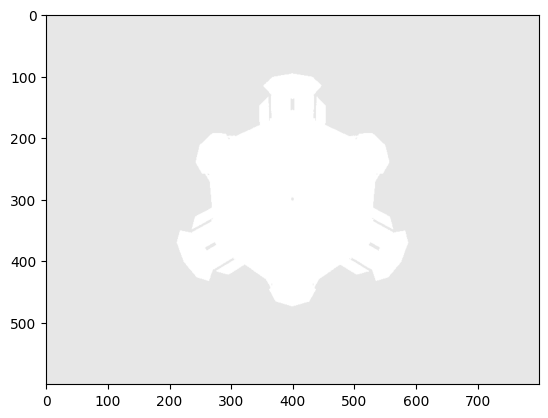

array([[[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [231, 231, 231],
        [231, 231, 231],
        [231, 231, 231]],

       [[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [231, 231, 231],
        [231, 231, 231],
        [231, 231, 231]],

       [[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [231, 231, 231],
        [231, 231, 231],
        [231, 231, 231]],

       ...,

       [[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [231, 231, 231],
        [231, 231, 231],
        [231, 231, 231]],

       [[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [231, 231, 231],
        [231, 231, 231],
        [231, 231, 231]],

       [[231, 231, 231],
        [231, 231, 231],
        [231, 231, 231],
        ...,
        [231, 231, 231],
        [231, 231, 231],
        [231, 231, 231]]

In [ ]:

# /////////////////////////////////////////////////////////
def BoundingBox(V):
   x1,y1,z1=V[0][0:3]
   x2,y2,z2=V[0][0:3]
   for coords in V:
      x,y,z=coords[0:3]
      x1,x2=min(x1,x),max(x2,x)
      y1,y2=min(y1,y),max(y2,y)
      z1,z2=min(z1,z),max(z2,z)
   return (x1,y1,z1,x2,y2,z2)

# /////////////////////////////////////////////////////////
def LoadMesh(filename):

   from plyfile import PlyData, PlyElement
   plydata = PlyData.read(filename)

   V=[plydata['vertex'][I].tolist() for I in range(len(plydata['vertex']))]
   T   =[list(plydata['face']['vertex_indices'][I].tolist()) for I in range(len(plydata['face']))]
   assert(all([len(it)==3 for it in T]))

   print(V)

   C=[]
   x1,y1,z1,x2,y2,z2=BoundingBox(V)
   for I,coords in enumerate(V):
      if len(coords)==7:
         x,y,z,r,g,b,a=coords[0:7]
      else:
         x,y,z=coords[0:3]
         r,g,b,a=[0.7,0.6,0.6,1.0]

      x=(x-x1)/(x2-x1)
      y=(y-y1)/(y2-y1)
      z=(z-z1)/(z2-z1)
      V[I]=(x,y,z)

      C.append([r,g,b,a])

   ret = []
   for (i,j,k) in T:
      # using only the first color here
      ret.append(Triangle(V[i],V[j],V[k], color([it/255.0 for it in C[i][0:3]]), Finish( 'ambient', 0.2, 'diffuse',0.4 , 'specular',.35,'roughness',.1,  'phong', 0.1)))

   return ret

scene=Scene( 
  Camera('location',  [2, 2, 2], 'direction', [-1, -1, -1], 'look_at',  [0, 0, 0]), 
   [
      LightSource([-20,  0, 40 ], 'color','White*0.7'), 
      LightSource([  0,  0, 40 ], 'color','White*0.5'), 
      LightSource([-50,-40, 0  ], 'color','White*0.3'), 
      LightSource([-20,-30, 5  ], 'color','White*1.0'), 
      LightSource([-45, 15, 5.5], 'color','White*0.4'), 

      SkySphere(Pigment( 'color', [0.8,0.8,0.8])),

      # Plane( [0,1,0], 0 , color([1.0, 1.0, 1.0]), Finish(  'phong', 0.1, 'reflection', 0.0) ), 

   ] + LoadMesh('../temp.ply'),
   included=[
      'colors.inc', 
      'shapes.inc',
      'textures.inc',
      'metals.inc',
      'skies.inc'
   ],
   global_settings=[
      'assumed_gamma',1,
      'max_trace_level',5,
      Radiosity(
         'brightness', 2.0,
         'count', 100,
         'error_bound', 0.15,
         'gray_threshold', 0.0,
         'low_error_factor', 0.2,
         'minimum_reuse', 0.015,
         'nearest_count', 10,
         'recursion_limit', 5,
         'adc_bailout', 0.01,
         'max_sample', 0.5,
         'media off',
         'normal off',
         'always_sample', 1,
         'pretrace_start', 0.08,
         'pretrace_end', 0.01
      )] )

RenderScene(scene)

In [9]:
from plyfile import PlyData, PlyElement
plydata = PlyData.read('../temp.ply')
plydata['face']['vertex_index']

array([array([0, 1, 2], dtype=int32), array([3, 4, 5], dtype=int32),
       array([6, 7, 8], dtype=int32), array([ 9, 10, 11], dtype=int32),
       array([12, 13, 14], dtype=int32), array([15, 16, 17], dtype=int32),
       array([18, 19, 20], dtype=int32), array([21, 22, 23], dtype=int32),
       array([24, 25, 26], dtype=int32), array([27, 28, 29], dtype=int32),
       array([30, 31, 32], dtype=int32), array([33, 34, 35], dtype=int32),
       array([36, 37, 38], dtype=int32), array([39, 40, 41], dtype=int32),
       array([42, 43, 44], dtype=int32), array([45, 46, 47], dtype=int32),
       array([48, 49, 50], dtype=int32), array([51, 52, 53], dtype=int32),
       array([54, 55, 56], dtype=int32), array([57, 58, 59], dtype=int32),
       array([60, 61, 62], dtype=int32), array([63, 64, 65], dtype=int32),
       array([66, 67, 68], dtype=int32), array([69, 70, 71], dtype=int32),
       array([72, 73, 74], dtype=int32), array([75, 76, 77], dtype=int32),
       array([78, 79, 80], dtype=i